Task-1:-  Image Denoising, Extract images from video, Process images of a video

Image Denoising

/usr/local/lib/python3.11/dist-packages/skimage/metrics/simple_metrics.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)


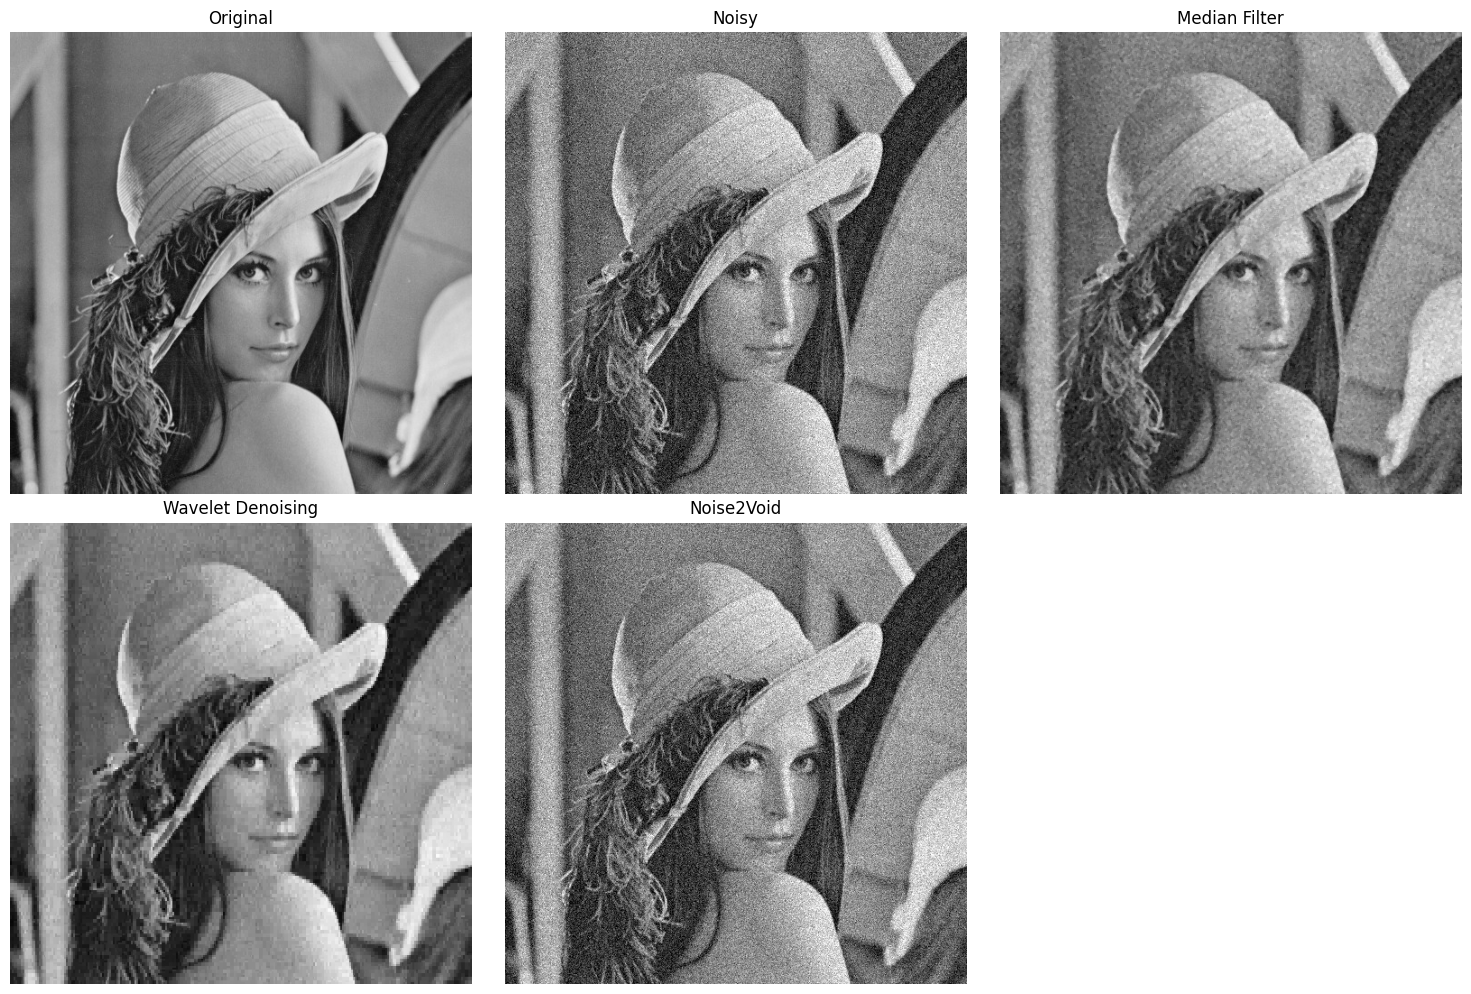


Denoising Performance Metrics:
Method          MSE        PSNR       SSIM      
Original        0.00       inf        1.0000    
Noisy           645.24     20.03      0.2931    
Median Filter   138.99     26.70      0.5712    
Wavelet         112.53     27.62      0.7019    
Noise2Void      644.94     20.04      0.2931    


In [ ]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity, mean_squared_error
from skimage.restoration import denoise_wavelet
from skimage.util import random_noise
import matplotlib.pyplot as plt

def load_image(image_path):
    """Load an image in grayscale"""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found at {image_path}")
    return img

def add_gaussian_noise(image, mean=0, var=0.01):
    """Add Gaussian noise to an image"""
    noisy = random_noise(image, mode='gaussian', mean=mean, var=var)
    return (noisy * 255).astype(np.uint8)

def median_filter_denoise(noisy_img, kernel_size=3):
    """Apply median filter denoising"""
    return cv2.medianBlur(noisy_img, kernel_size)

def wavelet_denoise(noisy_img):
    """Apply wavelet denoising"""

    img_float = noisy_img.astype(np.float32) / 255.0
    denoised = denoise_wavelet(img_float, channel_axis=None, rescale_sigma=True)
    return (denoised * 255).astype(np.uint8)

def noise2void_denoise(noisy_img):
    """Apply Noise2Void denoising (simplified implementation)"""

    return cv2.fastNlMeansDenoising(noisy_img, None, h=10, templateWindowSize=7, searchWindowSize=21)

def evaluate_denoising(original, denoised):
    """Calculate evaluation metrics"""
    mse = mean_squared_error(original, denoised)
    psnr = peak_signal_noise_ratio(original, denoised)
    ssim = structural_similarity(original, denoised)
    return {'MSE': mse, 'PSNR': psnr, 'SSIM': ssim}

def compare_denoising_methods(image_path):
    """Compare denoising methods on a sample image"""

    original = load_image(image_path)
    noisy = add_gaussian_noise(original)


    median_denoised = median_filter_denoise(noisy)
    wavelet_denoised = wavelet_denoise(noisy)
    n2v_denoised = noise2void_denoise(noisy)


    results = {
        'Original': evaluate_denoising(original, original),
        'Noisy': evaluate_denoising(original, noisy),
        'Median Filter': evaluate_denoising(original, median_denoised),
        'Wavelet': evaluate_denoising(original, wavelet_denoised),
        'Noise2Void': evaluate_denoising(original, n2v_denoised)
    }


    plt.figure(figsize=(15, 10))

    images = [
        ('Original', original),
        ('Noisy', noisy),
        ('Median Filter', median_denoised),
        ('Wavelet Denoising', wavelet_denoised),
        ('Noise2Void', n2v_denoised)
    ]

    for i, (title, img) in enumerate(images, 1):
        plt.subplot(2, 3, i)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


    print("\nDenoising Performance Metrics:")
    print(f"{'Method':<15} {'MSE':<10} {'PSNR':<10} {'SSIM':<10}")
    for method, metrics in results.items():
        print(f"{method:<15} {metrics['MSE']:<10.2f} {metrics['PSNR']:<10.2f} {metrics['SSIM']:<10.4f}")


compare_denoising_methods('/content/lena.jpg')

Extract images from video

Starting frame extraction...
Video Info:
- Frames per second: 24.00
- Total frames: 367
- Duration: 15.29 seconds
- Extracting every 10 frame(s)

Extraction complete!
- Total frames processed: 367
- Frames saved: 37
- Output folder: extracted_frames

Sample extracted frames showing movement progression:


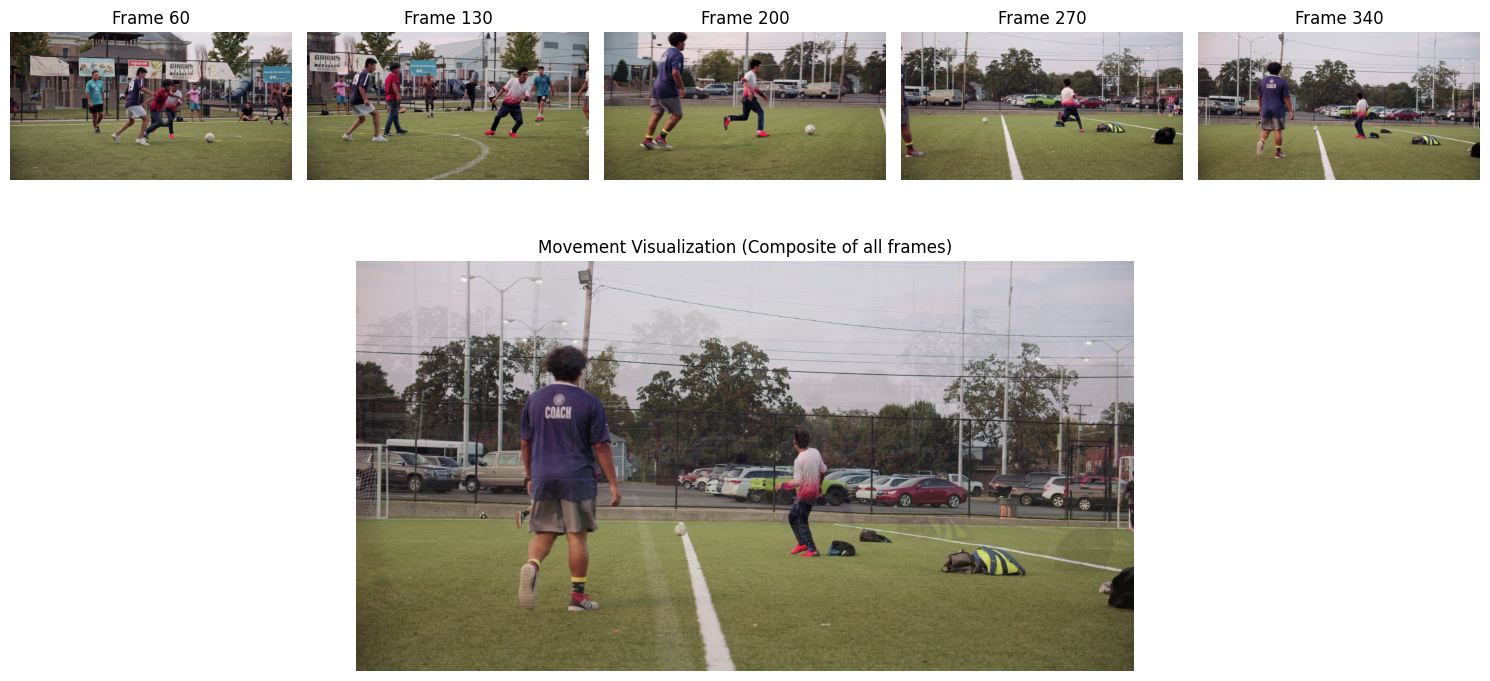

In [ ]:


import cv2
import os
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline

def extract_frames(video_path, output_folder, frame_interval=1, display_samples=5):
    """
    Extracts frames from a video file and saves them as images.
    Displays sample frames and demonstrates movement visualization.

    Parameters:
        video_path (str): Path to the input video file
        output_folder (str): Folder where extracted frames will be saved
        frame_interval (int): Extract every nth frame (1=every frame)
        display_samples (int): Number of sample frames to display
    """

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)


    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video file")
        return


    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames / fps

    print(f"Video Info:")
    print(f"- Frames per second: {fps:.2f}")
    print(f"- Total frames: {total_frames}")
    print(f"- Duration: {duration:.2f} seconds")
    print(f"- Extracting every {frame_interval} frame(s)")

    frame_count = 0
    saved_count = 0
    sample_frames = []

    while True:

        ret, frame = cap.read()


        if not ret:
            break


        if frame_count % frame_interval == 0:

            output_path = os.path.join(output_folder, f"frame_{frame_count:06d}.jpg")


            cv2.imwrite(output_path, frame)
            saved_count += 1


            if len(sample_frames) < display_samples and saved_count % (total_frames//(display_samples*frame_interval)) == 0:

                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                sample_frames.append((frame_count, frame_rgb))


            if saved_count % 100 == 0:
                print(f"Saved {saved_count} frames...")

        frame_count += 1


    cap.release()

    print(f"\nExtraction complete!")
    print(f"- Total frames processed: {frame_count}")
    print(f"- Frames saved: {saved_count}")
    print(f"- Output folder: {output_folder}")


    if sample_frames:
        print("\nSample extracted frames showing movement progression:")


        plt.figure(figsize=(15, 8))


        for i, (fnum, frame) in enumerate(sample_frames):
            plt.subplot(2, display_samples, i+1)
            plt.imshow(frame)
            plt.title(f"Frame {fnum}")
            plt.axis('off')


        plt.subplot(2, 1, 2)


        height, width = sample_frames[0][1].shape[:2]
        movement_visualization = np.zeros((height, width, 3), dtype=np.float32)


        for i, (fnum, frame) in enumerate(sample_frames):
            alpha = 0.2 + 0.8 * (i / len(sample_frames))
            movement_visualization = movement_visualization * (1 - alpha) + frame.astype(np.float32) * alpha


        movement_visualization = np.clip(movement_visualization, 0, 255).astype(np.uint8)
        plt.imshow(movement_visualization)
        plt.title("Movement Visualization (Composite of all frames)")
        plt.axis('off')

        plt.tight_layout()
        plt.show()


if __name__ == "__main__":

    video_file = "/content/2932301-uhd_4096_2160_24fps.mp4"


    output_dir = "extracted_frames"


    interval = 10


    print("Starting frame extraction...")
    extract_frames(video_file, output_dir, interval, display_samples=5)

Process images of a video


Video Processing Started
Input: /content/2932301-uhd_4096_2160_24fps.mp4
Resolution: 2732x1440
FPS: 24.0
Total frames: 367

Processed 100/367 frames...
Processed 200/367 frames...
Processed 300/367 frames...

Processing complete! Creating outputs...
Collage saved to processed_output/frame_collage.jpg (3x3 grid)
Sample frames saved


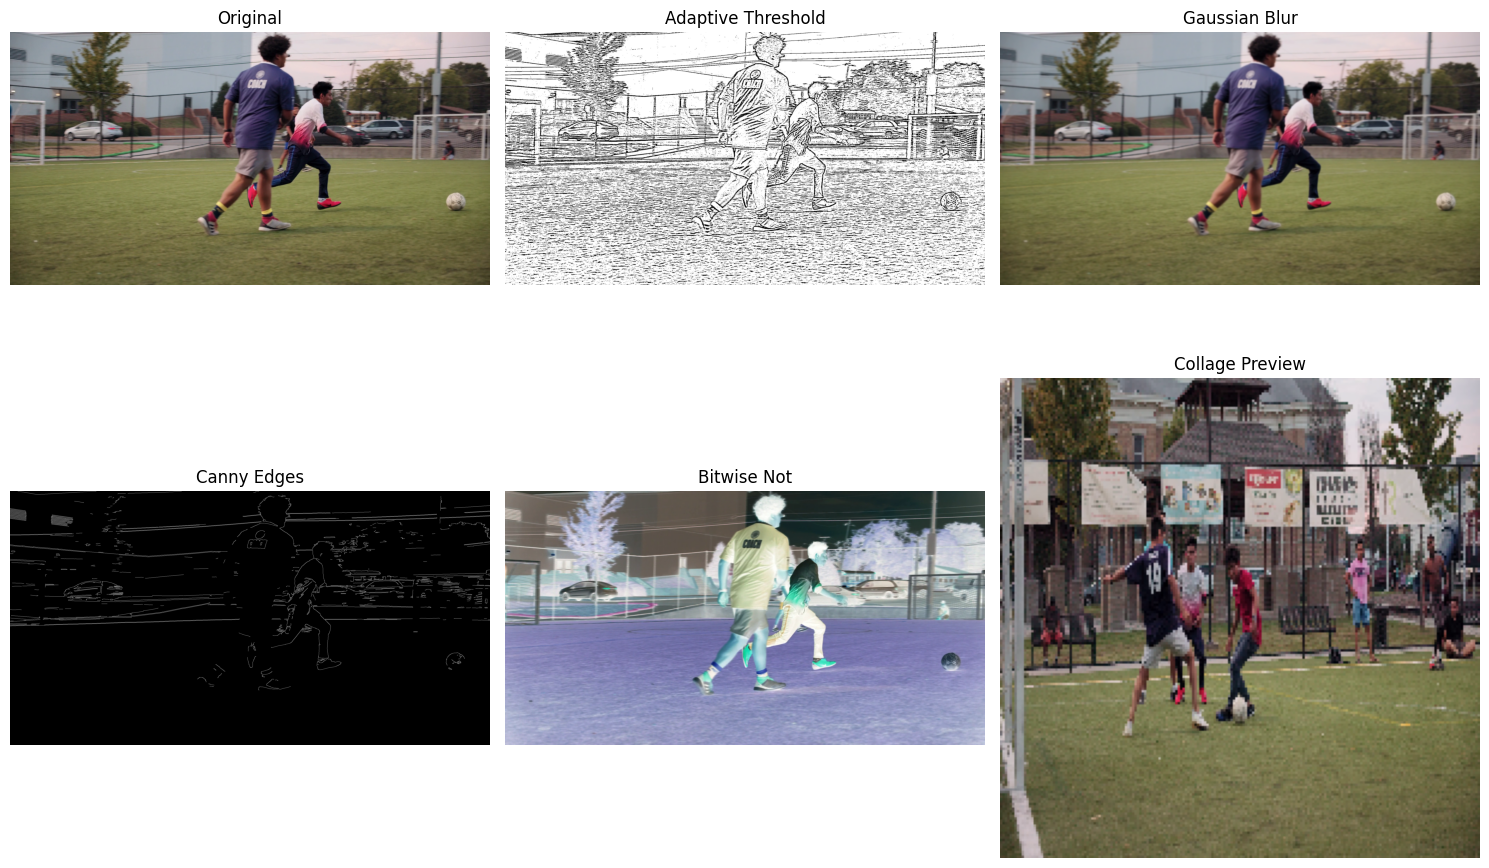

In [ ]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

def process_video_frames(input_path, output_dir):
    """
    Process video frames with multiple image processing operations,
    create new videos from transformed frames, and build a frame collage.

    Args:
        input_path (str): Path to input video file
        output_dir (str): Directory to save processed outputs
    """

    os.makedirs(output_dir, exist_ok=True)


    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print("Error: Could not open video file")
        return


    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"\nVideo Processing Started")
    print(f"Input: {input_path}")
    print(f"Resolution: {width}x{height}")
    print(f"FPS: {fps:.1f}")
    print(f"Total frames: {total_frames}\n")


    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writers = {
        'adaptive_threshold': cv2.VideoWriter(os.path.join(output_dir, 'adaptive_threshold.mp4'),
                            fourcc, fps, (width, height), 0),
        'gaussian_blur': cv2.VideoWriter(os.path.join(output_dir, 'gaussian_blur.mp4'),
                       fourcc, fps, (width, height)),
        'canny_edges': cv2.VideoWriter(os.path.join(output_dir, 'canny_edges.mp4'),
                     fourcc, fps, (width, height), 0),
        'bitwise_not': cv2.VideoWriter(os.path.join(output_dir, 'bitwise_not.mp4'),
                    fourcc, fps, (width, height))
    }


    collage_frames = []
    frame_interval = max(1, total_frames // 9) if total_frames >= 9 else 1
    processed_samples = {}

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break



        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv2.THRESH_BINARY, 11, 2)
        writers['adaptive_threshold'].write(adaptive_thresh)


        gaussian_blur = cv2.GaussianBlur(frame, (15, 15), 0)
        writers['gaussian_blur'].write(gaussian_blur)


        edges = cv2.Canny(gray, 100, 200)
        writers['canny_edges'].write(cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR))


        bitwise_not = cv2.bitwise_not(frame)
        writers['bitwise_not'].write(bitwise_not)


        if frame_count == total_frames // 2:
            processed_samples = {
                'original': frame,
                'adaptive_threshold': adaptive_thresh,
                'gaussian_blur': gaussian_blur,
                'canny_edges': edges,
                'bitwise_not': bitwise_not
            }


        if frame_count % frame_interval == 0:
            collage_frames.append(cv2.resize(frame, (200, 200)))
            if len(collage_frames) >= 9:
                break

        frame_count += 1
        if frame_count % 100 == 0:
            print(f"Processed {frame_count}/{total_frames} frames...")


    cap.release()
    for writer in writers.values():
        writer.release()

    print("\nProcessing complete! Creating outputs...")


    if collage_frames:
        create_collage(collage_frames, output_dir, total_frames)
    else:
        print("No frames available for collage")


    if processed_samples:
        save_samples(processed_samples, output_dir)
    else:
        print("No frames available for samples")


    if processed_samples and collage_frames:
        display_results(processed_samples, collage_frames)

def create_collage(frames, output_dir, total_frames):
    """Create a collage from available frames."""

    if len(frames) >= 9:
        rows = 3
        cols = 3
    elif len(frames) >= 4:
        rows = 2
        cols = 2
    elif len(frames) >= 1:
        rows = 1
        cols = min(3, len(frames))
    else:
        print("No frames available for collage")
        return


    collage_rows = []
    for i in range(rows):
        row_start = i * cols
        row_end = row_start + cols
        row_frames = frames[row_start:row_end]


        if len(row_frames) < cols:

            while len(row_frames) < cols:
                row_frames.append(np.zeros_like(row_frames[0]))

        row = np.hstack(row_frames)
        collage_rows.append(row)

    collage = np.vstack(collage_rows)
    collage_path = os.path.join(output_dir, "frame_collage.jpg")
    cv2.imwrite(collage_path, collage)
    print(f"Collage saved to {collage_path} ({rows}x{cols} grid)")

def save_samples(samples, output_dir):
    """Save sample processed frames."""
    for name, img in samples.items():
        if len(img.shape) == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        cv2.imwrite(os.path.join(output_dir, f"sample_{name}.jpg"), img)
    print("Sample frames saved")

def display_results(samples, collage_frames):
    """Display sample processed frames and collage preview."""
    plt.figure(figsize=(15, 10))


    for i, (name, img) in enumerate(samples.items()):
        plt.subplot(2, 3, i+1)
        if len(img.shape) == 2:
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(name.replace('_', ' ').title())
        plt.axis('off')


    plt.subplot(2, 3, 6)
    if len(collage_frames) > 0:
        plt.imshow(cv2.cvtColor(collage_frames[0], cv2.COLOR_BGR2RGB))
    plt.title("Collage Preview")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":

    input_video = "/content/2932301-uhd_4096_2160_24fps.mp4"
    output_directory = "processed_output"


    process_video_frames(input_video, output_directory)

Task-2:-  Video classification using CNN+LSTM or 3D CNN model.

Subset dataset created successfully at: /content/UCF101_subset


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 16, 110, 110,   │           448 │
│ (TimeDistributed)               │ 16)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 16, 55, 55, 16) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 16, 53, 53, 32) │         4,640 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 16, 26, 26, 32) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 16, 24, 24, 64) │        18,496 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 16, 12, 12, 64) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 16, 9216)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 16, 64)         │     2,375,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,414,373 (9.21 MB)

 Trainable params: 2,414,373 (9.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - accuracy: 0.0681 - loss: 1.6853 - val_accuracy: 0.2000 - val_loss: 1.6249
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step - accuracy: 0.2212 - loss: 1.6065 - val_accuracy: 0.3000 - val_loss: 1.6004
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.1917 - loss: 1.6372 - val_accuracy: 0.2000 - val_loss: 1.5976
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.2347 - loss: 1.5601 - val_accuracy: 0.6000 - val_loss: 1.5330
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 6s/step - accuracy: 0.4646 - loss: 1.4598 - val_accuracy: 0.2000 - val_loss: 1.5441
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.5299 - loss: 1.3666 - val_accuracy: 0.5000 - val_loss: 1.4036
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.5990 - loss: 1.3083 - val_accuracy: 0.3000 - val_loss: 1.5584
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.5833 - loss: 1.2283 - val_accuracy: 0.4000 - val_loss: 1.3801
Epoch 9/

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


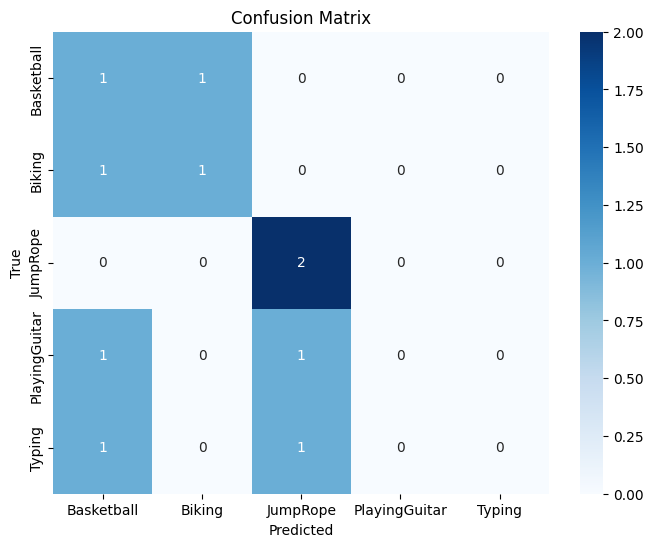

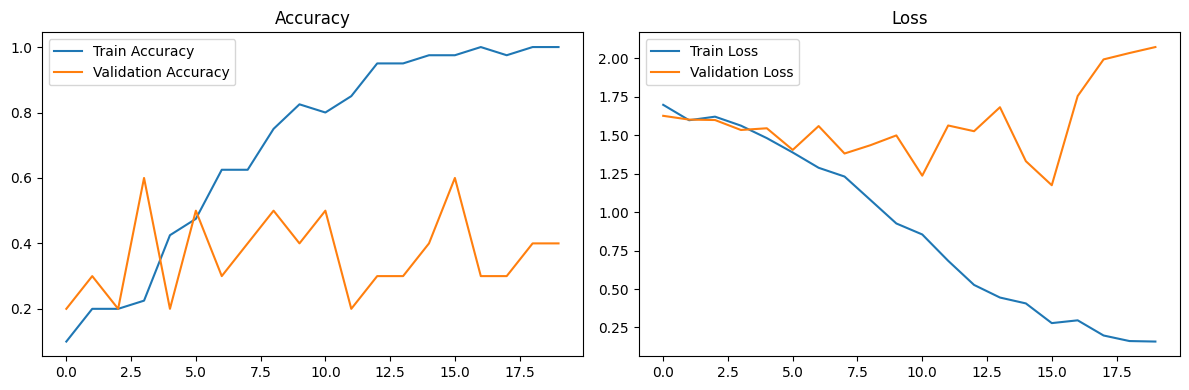

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten,
                                   LSTM, Dense, TimeDistributed, Dropout)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import random
import shutil




random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


SELECTED_CLASSES = ['Basketball', 'Biking', 'PlayingGuitar', 'Typing', 'JumpRope']
VIDEOS_PER_CLASS = 10
FRAME_SIZE = (112, 112)
SEQUENCE_LENGTH = 16
SKIP_FRAMES = 5
TEST_SIZE = 0.2
BATCH_SIZE = 8
EPOCHS = 20


SOURCE_DIR = '/content/drive/MyDrive/UCF101/UCF-101'
DEST_DIR = '/content/UCF101_subset'


def create_subset_dataset(source_dir, dest_dir):
    os.makedirs(dest_dir, exist_ok=True)
    for cls in SELECTED_CLASSES:
        class_path = os.path.join(source_dir, cls)
        dest_class_path = os.path.join(dest_dir, cls)
        os.makedirs(dest_class_path, exist_ok=True)


        all_videos = os.listdir(class_path)


        selected = random.sample(all_videos, min(VIDEOS_PER_CLASS, len(all_videos)))

        for video in selected:
            shutil.copy(os.path.join(class_path, video), dest_class_path)


if not os.path.exists(DEST_DIR):
    create_subset_dataset(SOURCE_DIR, DEST_DIR)
    print("Subset dataset created successfully at:", DEST_DIR)
else:
    print("Subset dataset already exists at:", DEST_DIR)


def extract_frames(video_path, frame_size, sequence_length, skip_frames):
    frames = []
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    extracted_frames = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_count += 1


        if frame_count % skip_frames != 0:
            continue


        frame = cv2.resize(frame, frame_size)
        frame = frame / 255.0

        frames.append(frame)
        extracted_frames += 1


        if extracted_frames >= sequence_length:
            break

    cap.release()


    while len(frames) < sequence_length:
        frames.append(np.zeros((frame_size[1], frame_size[0], 3)))

    return np.array(frames[:sequence_length])


def load_dataset(dataset_path, frame_size, sequence_length, skip_frames):
    features = []
    labels = []
    class_names = os.listdir(dataset_path)

    for class_name in class_names:
        class_path = os.path.join(dataset_path, class_name)
        video_files = os.listdir(class_path)

        for video_file in video_files:
            video_path = os.path.join(class_path, video_file)
            frames = extract_frames(video_path, frame_size, sequence_length, skip_frames)

            features.append(frames)
            labels.append(class_name)

    return np.array(features), np.array(labels)


features, labels = load_dataset(DEST_DIR, FRAME_SIZE, SEQUENCE_LENGTH, SKIP_FRAMES)


label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
one_hot_labels = to_categorical(encoded_labels)


X_train, X_test, y_train, y_test = train_test_split(
    features, one_hot_labels, test_size=TEST_SIZE, random_state=42, stratify=encoded_labels)


def create_cnn_lstm_model(input_shape, num_classes):
    model = Sequential()


    model.add(TimeDistributed(Conv2D(16, (3, 3), activation='relu'), input_shape=input_shape))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Conv2D(64, (3, 3), activation='relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Flatten()))


    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32))


    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model


input_shape = (SEQUENCE_LENGTH, FRAME_SIZE[1], FRAME_SIZE[0], 3)
num_classes = len(SELECTED_CLASSES)
model = create_cnn_lstm_model(input_shape, num_classes)


model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_test, y_test),
                    verbose=1)


def evaluate_model(model, X_test, y_test, label_encoder):

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)


    print("Classification Report:")
    print(classification_report(y_true_classes, y_pred_classes,
                               target_names=label_encoder.classes_))


    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


evaluate_model(model, X_test, y_test, label_encoder)

In [ ]:
!pip install n2v csbdeep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.3/210.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install opencv-python numpy matplotlib

In [ ]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 20.6 MB/s eta 0:00:00


In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 56.0 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.9 MB/s eta 0:00:00


In [ ]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 14.5 MB/s eta 0:00:00
